In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
s=Service("C:\\Users\\shoai\\.wdm\\drivers\\chromedriver\\win32\\99.0.4844.51\\chromedriver.exe")
driver=webdriver.Chrome(service=s)
driver.get('https://www.instagram.com/')
time.sleep(5)
driver.find_element(By.CLASS_NAME,'KPnG0').click()
time.sleep(3)
email_type=driver.find_element(By.ID,'email')
email_type.send_keys('shoiabshama@ibibo.com')
passw=driver.find_element(By.ID,'pass')
passw.send_keys('allahisone1D')
driver.find_element(By.ID,'loginbutton').click()
time.sleep(8)
driver.find_element(By.XPATH,"/html/body/div[5]/div/div/div/div[3]/button[2]").click()

## Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers


In [15]:
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]').click()
input_F=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
input_F.send_keys('food')
time.sleep(1)
name=driver.find_elements(By.CLASS_NAME,'qyrsm')
j=0
link='https://www.instagram.com/'
d={}
# Here i made a dictionary D and in which i stored the name and link of the insta page
for i in name:
    if j==10:
        break
    if 'food' in i.text and '#' not in i.text:
        d[i.text]=link+i.text +'/'
        j+=1
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]').click()
# Here now we move to each of the 10 instagram id extracted and fetch the followers of them one byone
# print(d)
j=1
insta_id={}
for i in d:
    driver.get(d[i])
    time.sleep(3)
    if(i=='idontsharefoodsorry'):
        exc=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/div')
        iu=exc.get_attribute('outerHTML')
        iu=iu.split('"')
        insta_id[i]=int(iu[5].replace(',',''))
    else:
        fo=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')
        z=fo.get_attribute('outerHTML')
        z=z.split('"')
        insta_id[i]=int(z[3].replace(',',''))
#         print(i,d[i])
    j+=1
    driver.back()
# Then just sort the dictionary obtained and then print the first 5 , that is the required answer
import operator
insta_id
insta_id = dict( sorted(insta_id.items(), key=operator.itemgetter(1),reverse=True))
insta_id
t=0
for i in insta_id:
    if(t==5):
        break
    print(i)
    t+=1

foodie_incarnate
dilsefoodie
foodtalkindia
food
food.slayers_


### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [74]:
no_of_post_past_3_days={}
times=0
for i in insta_id:
    if times==5:
        break
    driver.get(link+i+'/' )
    time.sleep(3)
    driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div').click()
    time.sleep(1)
    date=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[2]/div/a/div/time')
    tme=0
    mins=''
    if(times==4):
        tme=(int(date.text.split()[1]))
    else:
        tme=(int(date.text.split()[0]))
        mins=date.text.split()[1]
    no_of_post_past_3_days[i]=1
    driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').click()
    time.sleep(2)
    while(tme<=3 or 'MINUTES' in mins or "HOURS" in mins):
        date=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[2]/div/a/div/time')
        tme=0
        if(times==4):
            tme=(int(date.text.split()[1]))
        else:
            tme=(int(date.text.split()[0]))
            mins=date.text.split()[1]
        if('DAYS' in mins and tme==4):
            break
        no_of_post_past_3_days[i]+=1
        driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div[2]/button').click()
        time.sleep(2)
    times+=1
driver.find_element(By.XPATH,'/html/body/div[6]/div[1]/button').click()
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/div[1]/div/a').click()
for i in no_of_post_past_3_days:
    print(i,no_of_post_past_3_days[i])

foodie_incarnate 5
dilsefoodie 11
foodtalkindia 4
food 15
foodiewe 1


### 1.3 Depict this information using a suitable graph.

{'foodie_incarnate': 5, 'dilsefoodie': 11, 'foodtalkindia': 4, 'food': 15, 'foodiewe': 1}


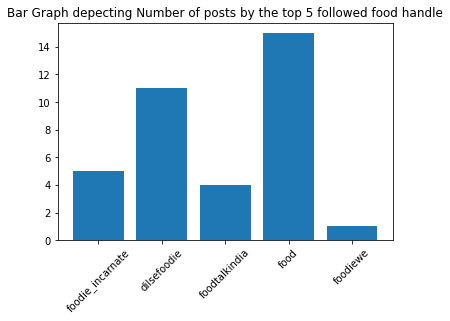

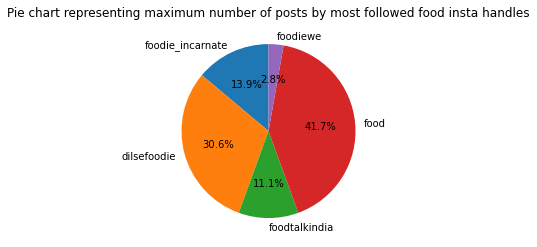

In [89]:
import matplotlib.pyplot as ply
insta_handle=[]
posts=[]
for i in no_of_post_past_3_days:
    insta_handle.append(i)
    posts.append(no_of_post_past_3_days[i])
print(no_of_post_past_3_days)
ply.bar(insta_handle,posts)
ply.title("Bar Graph depecting Number of posts by the top 5 followed food handle")
ply.xticks(rotation = 45)
ply.show()
ply.pie(posts,labels=insta_handle,autopct='%.1f%%',startangle=90)
ply.title('Pie chart representing maximum number of posts by most followed food insta handles')
ply.show()

## Your friend also needs a list of hashtags that he should use in his posts.

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [6]:
from selenium.common.exceptions import NoSuchElementException
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]').click()
input_F=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
input_F.send_keys('food')
time.sleep(1)
name=driver.find_elements(By.CLASS_NAME,'qyrsm')
j=0
link='https://www.instagram.com/'
d={}
# Here i made a dictionary D and in which i stored the name and link of the insta page
for i in name:
    if j==10:
        break
    if 'food' in i.text and '#' not in i.text:
        d[i.text]=link+i.text +'/'
        j+=1
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]').click()
# Here now we move to each of the 10 instagram id extracted and fetch the followers of them one byone
# print(d)
j=1
insta_id={}
for i in d:
    driver.get(d[i])
    time.sleep(3)
    if(i=='idontsharefoodsorry'):
            exc=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/div')
            iu=exc.get_attribute('outerHTML')
            iu=iu.split('"')
            insta_id[i]=int(iu[5].replace(',',''))
    else:
        fo=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')
        z=fo.get_attribute('outerHTML')
        z=z.split('"')
        insta_id[i]=int(z[3].replace(',',''))
#         print(i,d[i])
    j+=1
    driver.back()
# Then just sort the dictionary obtained and then print the first 5 , that is the required answer
import operator
insta_id
insta_id = dict( sorted(insta_id.items(), key=operator.itemgetter(1),reverse=True))
for i in insta_id:
    driver.get(link+i+'/')
    print(i)
    time.sleep(3)
    try:
        driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]').click()
        time.sleep(2)
        print(1 ,driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text)
        driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').click()
    except:
        break
        pass
    
    time.sleep(3)
    for i in range(9):
        try:
            print(i+2 ,driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text)
            driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div[2]/button').click()
        except:
            pass
        time.sleep(3)
        

foodie_incarnate
1 Breakfast with the backdrop of mighty Himalayas😍😍

If cozy mountain stay is on your mind with the comfort of homely food, head over to Cedar Lodge by @aahma_hospitality . You won’t be disappointed🤗🤗
.
#foodieincarnate #sodelhi #foodtalkindia #delhifoodie #delhifoodblogger #nainital #ramgarh #resort #mountainresort #breakfastgoals #amarsirohi #desifood #staycation #staycations #mumbaifoodblogger #indianfoodbloggers #foodie #foodlover #foodporn #breakfast #mountainfood #foodwithaview #foodstagram #foodblogger #almora #himalayas #delhifoodie #delhifoodbloggers #delhifoodguide #mumbaifoodie
2 Epic Tawa Pulao Making of Maharashtra😱😱
.
Kindly watch the full video for location, price and other details🤗🤗
.
#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagram #foodie #indianstreetfood #streetfood #delhistreetfood #streetfoodindia #mumbaistreetfood #delhifoodie #f

5 #Collaboration @oakenglowwhisky What happens when you introduce five of India's best Whisky experts to India's first-ever Premium Smoky Whisky? From classic highballs to exotic all-original decoctions, there's a bit of something on offer for every kind of whisky lover! 🥃

Watch @shuchirsuri, @gigglewater411, @thebitterboss, @thespiritedmonk and @akhilesh_eternalspirit take on the challenge of bringing out the rich, smoky notes of @oakenglowwhisky. Coming soon to a bar near you.

#FollowYourGlow #OakenGlow #DrinkResponsibly
6 #HotFind #SmoothieBowls🫐🥝🍎

Easy and delicious smoothie bowls to add to your to cart on the days you want have great ‘gram-worthy meal, and are nutritious too. 

And drop down some more place in the comments below and we’ll add that to our list.📝
7 Day 1 at the Gin Explorers Club, Delhi- thank you to all of you for coming through and making this edition what it was! @ginexplorersclub

So excited to be back!😍🍸

Music courtesy: @madstarbase

@bombaysapphire @gordon

8 Butter chicken, tandoori roti and garma garam gajar ka halva ❤️

Follow for more pictures, reviews and recipes ✨

#food #foodporn #foodblogger #foodstagram #foodiesofindia #foodcoma #foodblogger #indianfoodpage #foodgram #foodinstagram #reels #foodreelsinindia #butterchicken #gajarkahalwa #foodinsta #foodies24hours #foodiedad #foodoftheday #foodnetwork
9 Masala Dosa ✨
.
.
Tag someone who loves dosa 😍

Follow for more pictures, reviews and recipes ✨

#food #foodporn #foodblogger #foodie #foodblog #foodcoma #foodism #foodlove #foodheaven #citruscafe #dosa #masaladosa #lovedosa❤️ #zingizest #foodshare #foodoptimising #foodvsco #foodiedad #foodforfoodies
10 Pizza is always a good idea 🍕
.
.
Margherita pizza, garlic bread and cheesy dip from @dominos_india 🍕

Follow for more pictures, reviews and recipes ✨

#food #foodporn #pizza #margehritapizza #dominos #dominospizza #garlicbread#cheesydip #foodblogger #foodphotography #foodstyling #foodcoma #foodheaven #foodlovers #foodgasm #foodaddict

3 Skipping is one my favourite 😍💪
.
.
#norest #workout #skipping #skippingrope #workoutgirl #FitnessChallenge #fitness #fitnessmotivation #fitnessgirl #fitgirl #weighlossjourney #weightloss #weightlosstransformation #gymgirl #cardio #CardioWorkout #quickcardio #caloriesincaloriesout
4 Summer and chuski are the best combination ever made 💛💫
Follow @the.crew.room for more aesthetic videos.
.
.
📍Janakpuri C4E market
.
.
#aesthetic #aestheticfood #chuski #indianstreetfood #indianaesthetics #streetfood #indianfoodstories #kalakhatta #roohafza #icecandy #tastyindianfood #videoediting #reelitfeelit #reelkarofeelkaro #trendingreels #trending #summer
5 Tried the trending Chilli Garlic Noodles🧡
It turned to be EPIC 🤌💫
.
.
#chilligarlicnoodles #chilligarlic #garlicnoodles #noodles #maggi #tastyrecipes #trending #trendingfood #trendingreels #reelskarofeelkaro #reelitfeelit #foodreelsinindia #foodreels #delhifoodblogger #recipes #zingyzest #dillikabhukkad #theclichekitchen #foodbloggerindia
6 WORKO

### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [72]:
from selenium.common.exceptions import NoSuchElementException
words={}
k=1
for i in insta_id:
    if(k==6):
        break
    driver.get(link+i+'/')
    time.sleep(3)
    driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]').click()
    time.sleep(2)
    #print(1 ,driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text)
    try:
        w=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text
        diff_split=w.split()
        for j in diff_split:
            if j in words:
                words[str(j)]+=1
            else:
                words[str(j)]=1
        driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').click()
        time.sleep(3)
    except NoSuchElementException:
        pass
    for i in range(9):
        #print(i+2 ,driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text)
        try:
            w=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span').text
            diff_split=w.split()
            for j in diff_split:
                if j in words:
                    words[str(j)]+=1
                else:
                    words[str(j)]=1
            driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div[2]/button').click()
            time.sleep(3)
        except NoSuchElementException:
            continue
    k+=1
print(words)

{'Epic': 1, 'Tawa': 1, 'Pulao': 1, 'Making': 6, 'of': 31, 'Maharashtra😱😱': 1, '.': 20, 'Kindly': 5, 'watch': 5, 'the': 50, 'full': 6, 'video': 6, 'for': 10, 'location,': 5, 'price': 5, 'and': 33, 'other': 5, 'details🤗🤗': 5, '#foodieincarnate': 10, '#sodelhi': 8, '#newdelhi': 7, '#foodtalkindia': 8, '#delhigram': 7, '#indianfood': 8, '#delhifoodblogger': 8, '#foodgasm': 8, '#foodporn': 16, '#foodpornshare': 5, '#foodlover': 6, '#foodgram': 5, '#foodiesofinstagram': 5, '#foodie': 14, '#indianstreetfood': 6, '#streetfood': 7, '#delhistreetfood': 5, '#streetfoodindia': 5, '#mumbaistreetfood': 5, '#delhifoodie': 7, '#foodblogger': 14, '#indianfoodie': 6, '#desikhana': 6, '#indianfoodblogger': 6, '#indianfoodbloggers': 6, '#delhifood': 7, '#mumbai': 5, '#delhi': 5, '#nashik': 1, '#tawapulao': 1, 'Ayappa': 1, 'Uncle': 1, 'Delicious': 1, 'Rava': 1, 'Dosa🤩🤩': 1, '#vadodara': 2, '#dosa': 1, 'TASTIEST': 1, 'FAFDA': 1, 'Ahmedabad❤❤': 1, 'I': 1, 'ate': 1, 'fafda': 3, 'at': 11, 'countless': 1, 'shop

### 2.3 Create a csv file with two columns : the word and its frequency

In [95]:
import pandas as pd
the_words=[]
frequency=[]
for i in words:
    the_words.append(i)
    frequency.append(words[i])
df = pd.DataFrame(list(zip(the_words, frequency)),columns =['Words', 'frequency'])
df

,Words,frequency
0,Epic,1
1,Tawa,1
2,Pulao,1
3,Making,6
4,of,31
...,...,...
925,#concept,1
926,#shawarma,2
927,👻🔥,1
928,#rolls,1


### 2.4 Now, find the hashtags that were most popular among these bloggers

In [101]:
hashtags={}
for i in words:
    if '#' in i:
        hashtags[i]=words[i]
hashtags=dict( sorted(hashtags.items(), key=operator.itemgetter(1),reverse=True))
print('the higest used hashtags is :')
for i in hashtags:
    print(i)
    break

the higest used hashtags is :
#foodporn


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.


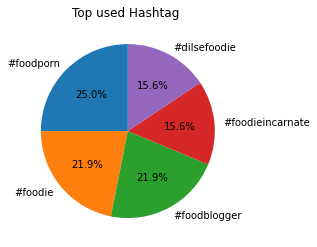

In [106]:
import matplotlib.pyplot as ply
tags=[]
frequ=[]
m=1
for i in hashtags:
    if(m==6):
        break
    tags.append(i)
    frequ.append(hashtags[i])
    m+=1
ply.pie(frequ,labels=tags,autopct='%.1f%%',startangle=90)
ply.title('Top used Hashtag ')
ply.show()

## You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [122]:
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]').click()
input_F=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
input_F.send_keys('food')
time.sleep(1)
name=driver.find_elements(By.CLASS_NAME,'qyrsm')
j=0
link='https://www.instagram.com/'
d={}
# Here i made a dictionary D and in which i stored the name and link of the insta page
for i in name:
    if j==10:
        break
    if 'food' in i.text and '#' not in i.text:
        d[i.text]=link+i.text +'/'
        j+=1
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]').click()
# Here now we move to each of the 10 instagram id extracted and fetch the followers of them one byone
j=1
insta_id={}
for i in d:
    driver.get(d[i])
    time.sleep(3)
    if(i=='idontsharefoodsorry'):
        exc=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/div')
        iu=exc.get_attribute('outerHTML')
        iu=iu.split('"')
        insta_id[i]=int(iu[5].replace(',',''))
    else:
        fo=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')
        z=fo.get_attribute('outerHTML')
        z=z.split('"')
        insta_id[i]=int(z[3].replace(',',''))
#         print(i,d[i])
    j+=1
    driver.back()
# Then just sort the dictionary obtained and then print the first 5 , that is the required answer
import operator
insta_id
insta_id = dict( sorted(insta_id.items(), key=operator.itemgetter(1),reverse=True))
from selenium.common.exceptions import NoSuchElementException
k=1
for i in insta_id:
    if(k==6):
        break
    driver.get(link+i+'/')
    print(i)
    print('-------------------------------')
    time.sleep(3)
    driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]').click()
    time.sleep(2)
    try:
        likes=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div').text
        print(1,likes.split()[0])
    except:
        print(1,'Not available/ Hidden')
    driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').click()
    time.sleep(3)
    for i in range(9):
        try:
            likes=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div').text
            print(i+2,likes.split()[0])
        except:
            print(i+2,"Not available/ Hidden")
        driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div[2]/button').click()
        time.sleep(3)
    print('*********************************')
    k+=1

foodie_incarnate
-------------------------------
1 Not available/ Hidden
2 Not available/ Hidden
3 15,854
4 Not available/ Hidden
5 65,977
6 10,751
7 Not available/ Hidden
8 44,037
9 17,392
10 Not available/ Hidden
*********************************
dilsefoodie
-------------------------------
1 Not available/ Hidden
2 5,236
3 13,249
4 7,478
5 6,620
6 7,488
7 4,249
8 14,984
9 15,815
10 8,976
*********************************
foodtalkindia
-------------------------------
1 600
2 247
3 Not available/ Hidden
4 206
5 Not available/ Hidden
6 240
7 Not available/ Hidden
8 918
9 118
10 73
*********************************
food
-------------------------------
1 889
2 305
3 155
4 449
5 739
6 437
7 1,749
8 703
9 720
10 515
*********************************
food.slayers_
-------------------------------
1 82
2 144
3 119
4 173
5 172
6 211
7 206
8 229
9 251
10 247
*********************************


### 3.2 Calculate the average likes for a handle.

In [151]:
from selenium.common.exceptions import NoSuchElementException
likes_in_posts={}
count=1
for i in insta_id:
    if(count==6):
        break
    driver.get(link+i+'/')
    lis=[]
    time.sleep(3)
    try:
        driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]').click()
        time.sleep(2)
        likes=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div').text
        lis.append(int(likes.split()[0].replace(',','')))
        #print(likes.split()[0])
    except NoSuchElementException:
        lis.append(0)
    driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').click()
    time.sleep(3)
    for j in range(9):
        try:
            likes=driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div').text
            lis.append(int(likes.split()[0].replace(',','')))
            #print(likes.split()[0])
        except NoSuchElementException:
            lis.append(0)
        driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div[2]/button').click()
        time.sleep(3)
    likes_in_posts[i]=lis
    count+=1
likes_in_posts
# Here the 0 donates the no of likes is not available
# for i in likes_in_posts:
#     print(i," : ",likes_in_posts[i])
print("The average likes for a handle is ")
print('------------------------------------')
for i in likes_in_posts:
    print(i, sum(likes_in_posts[i])/len(likes_in_posts[i]))

The average likes for a handle is 
------------------------------------
foodie_incarnate 15438.3
dilsefoodie 8498.1
foodtalkindia 243.1
food 702.0
food.slayers_ 186.8


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [145]:
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]').click()
input_F=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
input_F.send_keys('food')
time.sleep(1)
name=driver.find_elements(By.CLASS_NAME,'qyrsm')
j=0
link='https://www.instagram.com/'
d={}
# Here i made a dictionary D and in which i stored the name and link of the insta page
for i in name:
    if j==10:
        break
    if 'food' in i.text and '#' not in i.text:
        d[i.text]=link+i.text +'/'
        j+=1
driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]').click()
# Here now we move to each of the 10 instagram id extracted and fetch the followers of them one byone
# print(d)
j=1
insta_id={}
for i in d:
    driver.get(d[i])
    time.sleep(3)
    if(i=='idontsharefoodsorry'):
        exc=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/div')
        iu=exc.get_attribute('outerHTML')
        iu=iu.split('"')
        insta_id[i]=int(iu[5].replace(',',''))
    else:
        fo=driver.find_element(By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')
        z=fo.get_attribute('outerHTML')
        z=z.split('"')
        insta_id[i]=int(z[3].replace(',',''))
#         print(i,d[i])
    j+=1
    driver.back()
# Then just sort the dictionary obtained and then print the first 5 , that is the required answer
import operator
insta_id
insta_id = dict( sorted(insta_id.items(), key=operator.itemgetter(1),reverse=True))
insta_id
print("Ratio of Average Likes Obtained to Number of followers ")
print('-------------------------------------------------------')
count=1
for i in insta_id:
    if(count==6):
        break
    print(i,(sum(likes_in_posts[i])/len(likes_in_posts[i]))/insta_id[i])
    count+=1

foodie_incarnate
dilsefoodie
foodtalkindia
food
food.slayers_
Ratio of Average Likes Obtained to Number of followers 
-------------------------------------------------------
foodie_incarnate 0.011956552074870223
dilsefoodie 0.007526133860289069
foodtalkindia 0.0007844649372363245
food 0.004040648582259645
food.slayers_ 0.0166817033561891


### 3.4 Create a bar graph to depict the above obtained information.

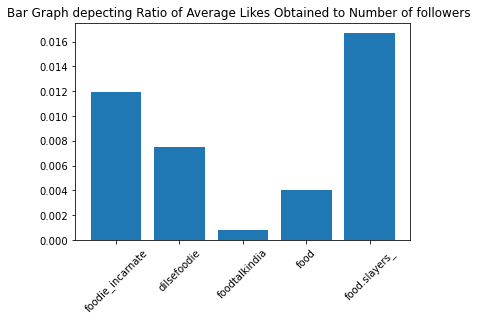

In [150]:
import matplotlib.pyplot as ply
handle=[]
ratio=[]
for i in likes_in_posts:
    handle.append(i)
    ratio.append((sum(likes_in_posts[i])/len(likes_in_posts[i]))/insta_id[i])
ply.bar(handle,ratio)
ply.title("Bar Graph depecting Ratio of Average Likes Obtained to Number of followers  ")
ply.xticks(rotation = 45)
ply.show()